In [193]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [194]:
xx = np.load('result.npy')

In [195]:
xx.max()

0.78397316

In [196]:
np.mean(xx[185:208])

0.021867123

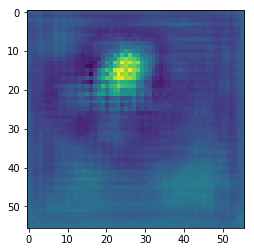

In [197]:
plt.imshow(np.sum(xx[185:208],0))

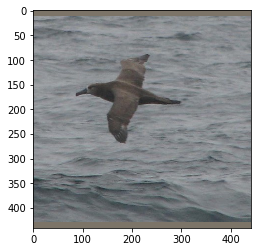

In [198]:
plt.imshow(cv2.imread('image.png'))

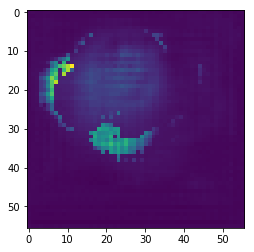

In [199]:
plt.imshow(np.sum(xx[27:51],0))

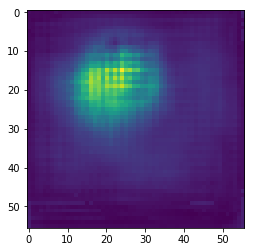

In [200]:
plt.imshow(np.sum(xx[51:81],0))

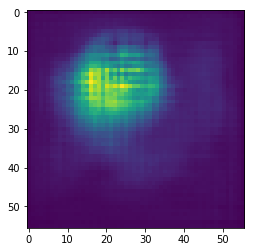

In [201]:
plt.imshow(np.sum(xx[81:100],0))

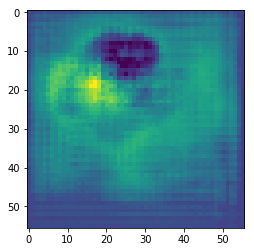

In [202]:
plt.imshow(np.sum(xx[100:119],0))

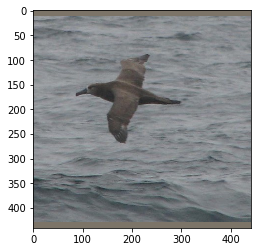

In [203]:
plt.imshow(cv2.imread('image.png'))

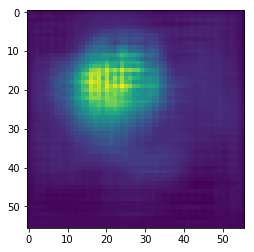

In [204]:
plt.imshow(np.mean(xx[208:223],0))

In [205]:
bill = np.mean(xx[0:27],0,keepdims=True)
wing = np.mean(xx[27:51],0,keepdims=True)
upperparts = np.mean(xx[51:81],0,keepdims=True)
breast = np.mean(xx[81:100],0,keepdims=True) #19
back = np.mean(xx[100:119],0,keepdims=True) #19
tail = np.mean(xx[119:159],0,keepdims=True) #40
head = np.mean(xx[159:170],0,keepdims=True) #11
throat = np.mean(xx[170:185],0,keepdims=True) #15
eye = np.mean(xx[185:208],0,keepdims=True) #23
forehead = np.mean(xx[208:223],0,keepdims=True) #15
nape = np.mean(xx[223:238],0,keepdims=True) #15
belly = np.mean(xx[238:257],0,keepdims=True) #19
leg = np.mean(xx[257:272],0,keepdims=True) #15
crown = np.mean(xx[272:287],0,keepdims=True) #15

In [150]:
bill = np.max(xx[0:27],0,keepdims=True)
wing = np.max(xx[27:51],0,keepdims=True)
upperparts = np.max(xx[51:81],0,keepdims=True)
breast = np.max(xx[81:100],0,keepdims=True) #19
back = np.max(xx[100:119],0,keepdims=True) #19
tail = np.max(xx[119:159],0,keepdims=True) #40
head = np.max(xx[159:170],0,keepdims=True) #11
throat = np.max(xx[170:185],0,keepdims=True) #15
eye = np.max(xx[185:208],0,keepdims=True) #23
forehead = np.max(xx[208:223],0,keepdims=True) #15
nape = np.max(xx[223:238],0,keepdims=True) #15
belly = np.max(xx[238:257],0,keepdims=True) #19
leg = np.max(xx[257:272],0,keepdims=True) #15
crown = np.max(xx[272:287],0,keepdims=True) #15

In [206]:
seg = np.concatenate((bill, wing, upperparts, breast, back, tail, head, throat, eye, forehead, nape, belly, leg, crown))
seg = np.argmax(cv2.resize(np.transpose(seg, (1,2,0)), (441,441)),axis=2)


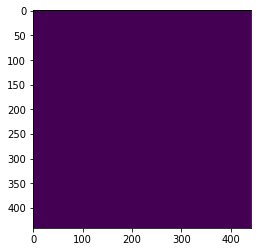

In [207]:
plt.imshow(seg*20)

In [208]:
seg

array([[8, 8, 8, ..., 8, 8, 8],
       [8, 8, 8, ..., 8, 8, 8],
       [8, 8, 8, ..., 8, 8, 8],
       ..., 
       [8, 8, 8, ..., 8, 8, 8],
       [8, 8, 8, ..., 8, 8, 8],
       [8, 8, 8, ..., 8, 8, 8]])

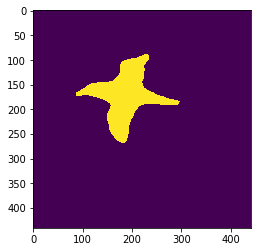

In [209]:
label = cv2.imread('gray.png',-1)
plt.imshow(seg*20*label)

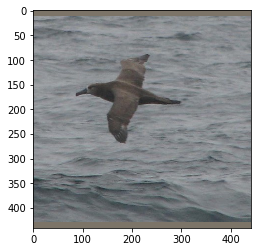

In [210]:
plt.imshow(cv2.imread('image.png'))

In [211]:
cam_list = np.concatenate((bill, wing, upperparts, breast, back, tail, head, throat, eye, forehead, nape, belly, leg, crown))
norm_cam = cam_list / (np.max(cam_list, (1, 2), keepdims=True) + 1e-5)

In [212]:
norm_cam.shape

(14, 56, 56)

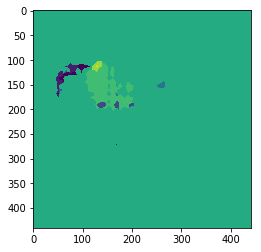

In [213]:
plt.imshow(np.argmax(cv2.resize(np.transpose(norm_cam, (1,2,0)), (441,441)),axis=2)*20)

In [256]:
xx = np.load('result.npy')
xx = xx / (np.max(xx, (1, 2), keepdims=True) + 1e-5)

In [175]:
xx

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ..., 
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.21036039,  0.39900461,  0.33216   , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.25635585,  0.4825632 ,  0.27407476, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.24399132,  0.28868964,  0.22497711, ...,  0.        ,
          0.        ,  0.        ],
        ..., 
        [ 0.        ,  0.        ,  0.03172742, ...,

In [268]:
import multiprocessing as mp

NCORE = 10

def process(q, iolock):
    from time import sleep
    while True:
        stuff = q.get()
        if stuff is None:
            break
        with iolock:
            print("processing", stuff)
        sleep(stuff)

if __name__ == '__main__':
    q = mp.Queue(maxsize=NCORE)
    iolock = mp.Lock()
    pool = mp.Pool(NCORE, initializer=process, initargs=(q, iolock))
    for stuff in range(20):
        q.put(stuff)  # blocks until q below its max size
        with iolock:
            print("queued", stuff)
    for _ in range(NCORE):  # tell workers we're done
        q.put(None)
    pool.close()
    pool.join()

('processing', 0)
('processing', 1)
('queued', 0)
('queued', 1)
('queued', 2)
('queued', 3)
('queued', 4)
('queued', 5)
('queued', 6)
('queued', 7)
('queued', 8)
('queued', 9)
('queued', 10)
('queued', 11)
('processing', 2)
('processing', 3)
('processing', 4)
('processing', 5)
('processing', 6)
('processing', 7)
('processing', 8)
('processing', 9)
('processing', 10)
('queued', 12)
('queued', 13)
('queued', 14)
('queued', 15)
('queued', 16)
('queued', 17)
('queued', 18)
('queued', 19)
('processing', 11)
('processing', 12)
('processing', 13)
('processing', 14)
('processing', 15)
('processing', 16)
('processing', 17)
('processing', 18)
('processing', 19)
